In [1]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('..')

In [2]:
# Load data from csv file
data_companies = pd.read_csv('ticker-overview.csv')
data_companies = data_companies.drop('Unnamed: 0', axis = 1)

In [3]:
data_companies['industryEn'].value_counts()

Construction & Materials       335
Industrial Goods & Services    265
Food & Beverage                150
Utilities                      145
Real Estate                    125
Basic Resources                110
Personal & Household Goods      77
Chemicals                       73
Health Care                     59
Financial Services              55
Travel & Leisure                50
Media                           41
Retail                          32
Technology                      30
Banks                           27
Automobiles & Parts             15
Insurance                       12
Oil & Gas                       12
Telecommunications               8
Name: industryEn, dtype: int64

In [4]:
# Only pick stickers from HOSE and HNX 
df = pd.read_csv('list-company-by-sector/Banks.csv')
bank_df = df.drop(df[(df['exchange'] == 'UPCOM') | (df['noShareholders'] == 0.0)].index)
bank_df

,exchange,shortName,industryID,industryIDv2,industry,industryEn,establishedYear,noEmployees,noShareholders,foreignPercent,...,deltaInMonth,deltaInYear,outstandingShare,issueShare,companyType,ticker,status,code,message,traceId
1,HOSE,ACB,289.0,8355.0,Ngân hàng,Banks,1993.0,11008.0,44011.0,0.300,...,-0.012,0.244,3377.4,3377.4,NH,ACB,NaN,NaN,NaN,NaN
2,HOSE,BIDV,289.0,8355.0,Ngân hàng,Banks,1993.0,25416.0,36773.0,0.173,...,0.002,0.347,5058.5,5058.5,NH,BID,NaN,NaN,NaN,NaN
6,HOSE,HDBank,289.0,8355.0,Ngân hàng,Banks,1992.0,13992.0,6015.0,0.190,...,0.097,0.136,2515.3,2530.3,NH,HDB,NaN,NaN,NaN,NaN
8,HOSE,LienVietPostBank,289.0,8355.0,Ngân hàng,Banks,2008.0,8105.0,59906.0,0.049,...,0.073,0.180,1729.1,1729.1,NH,LPB,NaN,NaN,NaN,NaN
9,HOSE,MBBank,289.0,8355.0,Ngân hàng,Banks,1994.0,15910.0,126621.0,0.232,...,0.015,-0.043,4534.0,4534.0,NH,MBB,NaN,NaN,NaN,NaN
10,HOSE,MSB Bank,289.0,8355.0,Ngân hàng,Banks,1991.0,5190.0,36939.0,0.300,...,0.008,-0.069,2000.0,2000.0,NH,MSB,NaN,NaN,NaN,NaN
12,HNX,Ngân hàng Bắc Á,289.0,8355.0,Ngân hàng,Banks,2011.0,2042.0,1678.0,0.000,...,-0.064,-0.042,833.4,813.4,NH,BAB,NaN,NaN,NaN,NaN
13,HNX,Ngân hàng Quốc Dân,289.0,8355.0,Ngân hàng,Banks,1995.0,2000.0,1440.0,0.088,...,-0.168,-0.287,556.8,560.2,NH,NVB,NaN,NaN,NaN,NaN
16,HOSE,SeABank,289.0,8355.0,Ngân hàng,Banks,2011.0,5320.0,3732.0,0.002,...,-0.044,0.272,2040.3,2040.3,NH,SSB,NaN,NaN,NaN,NaN
18,HOSE,SHB,289.0,8355.0,Ngân hàng,Banks,2006.0,7546.0,63268.0,0.068,...,0.056,-0.146,3066.9,3067.4,NH,SHB,NaN,NaN,NaN,NaN


In [5]:
bank_df.columns

Index(['exchange', 'shortName', 'industryID', 'industryIDv2', 'industry',
       'industryEn', 'establishedYear', 'noEmployees', 'noShareholders',
       'foreignPercent', 'website', 'stockRating', 'deltaInWeek',
       'deltaInMonth', 'deltaInYear', 'outstandingShare', 'issueShare',
       'companyType', 'ticker', 'status', 'code', 'message', 'traceId'],
      dtype='object')

In [6]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Define the sector of interest
sector = 'Banks'

# Load the ticket overview dataset
ticker_overview = pd.read_csv('ticker-overview.csv')

# Select the tickers for companies in the sector of interest
tickers = ticker_overview.loc[ticker_overview['industryEn'] == sector, 'ticker'].tolist()

2023-05-21 12:50:35.876268: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
# Load the historical price data for the selected tickers
dfs = []  # List to store individual DataFrames

for ticker in tickers:
    exchange = ticker_overview.loc[ticker_overview['ticker'] == ticker, 'exchange'].iloc[0]
    
    if exchange == 'HOSE':
        path = os.path.join('stock-historical-data', ticker + '-VNINDEX-History.csv')
        df = pd.read_csv(path)
        df = df.assign(Ticker=ticker)
        
        if df['Close'].isnull().sum() == 0:
            dfs.append(df)
            
    elif exchange == 'HNX':
        path = os.path.join('stock-historical-data', ticker + '-' + exchange + 'Index' + '-History.csv')
        df = pd.read_csv(path)
        df = df.assign(Ticker=ticker)
        
        if df['Close'].isnull().sum() == 0:
            dfs.append(df)
            
    elif exchange == 'UPCOM':
        continue

In [8]:
dfs[0]

,Unnamed: 0,Open,High,Low,Close,Volume,TradingDate,Ticker
0,0,5050.0,8234.0,6532.0,7147.0,56500,2006-11-21,ACB
1,1,6038.0,7861.0,7136.0,7394.0,62300,2006-11-22,ACB
2,2,6093.0,7959.0,7136.0,7597.0,69900,2006-11-23,ACB
3,3,5928.0,8344.0,7685.0,8058.0,63600,2006-11-24,ACB
4,4,6203.0,8860.0,7410.0,8058.0,42400,2006-11-27,ACB
...,...,...,...,...,...,...,...,...
4047,4047,25200.0,25550.0,24850.0,24850.0,2654851,2023-02-22,ACB
4048,4048,24750.0,25500.0,24250.0,25400.0,3862411,2023-02-23,ACB
4049,4049,25000.0,25300.0,24550.0,24600.0,2228733,2023-02-24,ACB
4050,4050,24500.0,24600.0,24100.0,24250.0,3109431,2023-02-27,ACB


Text(0.5, 1.0, 'Historical Price Data')

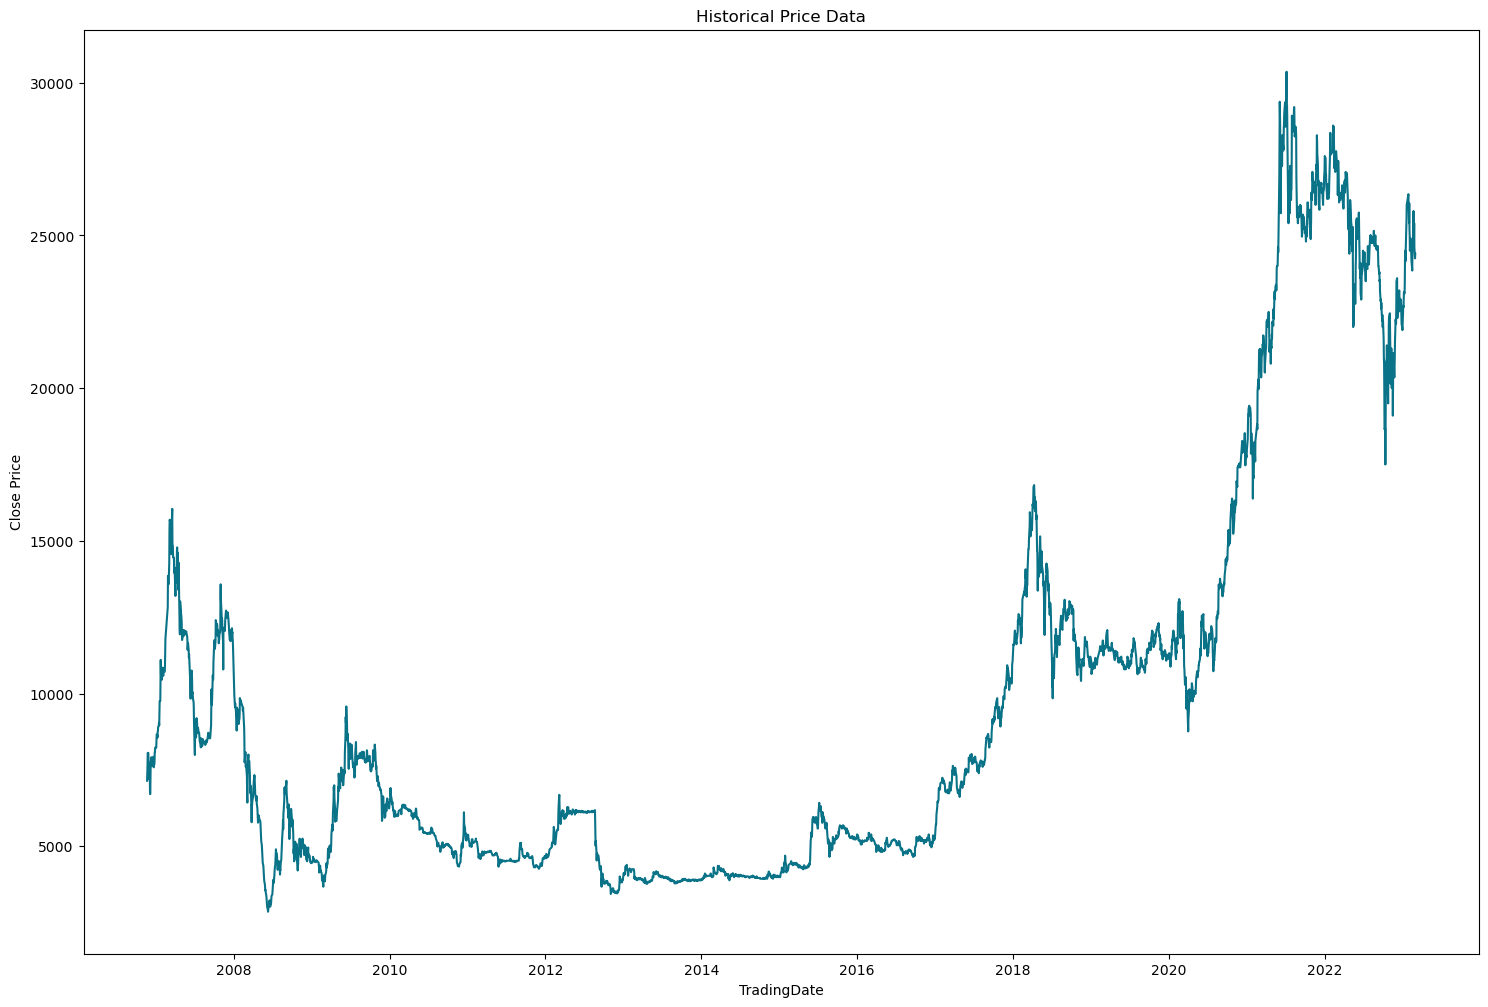

In [9]:
plt.rcParams['figure.figsize'] = (18, 12)
fig, ax = plt.subplots()
ax.plot(pd.to_datetime(dfs[0]['TradingDate'], format='%Y-%m-%d'), dfs[0]['Close'], '#0A7388')
ax.set_xlabel('TradingDate')
ax.set_ylabel('Close Price')
ax.set_title('Historical Price Data')

In [12]:
df = pd.concat(dfs, ignore_index=True)
df = df.drop('Unnamed: 0', axis = 1)
historical_prices = df[pd.to_datetime(df['TradingDate'], format='%Y-%m-%d') >= pd.Timestamp('2019-01-01')].copy()
historical_prices

,Open,High,Low,Close,Volume,TradingDate,Ticker
3020,11209.0,11199.0,10934.0,11057.0,1103106,2019-01-02,ACB
3021,9959.0,10881.0,9834.0,10641.0,1956382,2019-01-03,ACB
3022,10603.0,10931.0,10586.0,10716.0,2771983,2019-01-04,ACB
3023,10944.0,10921.0,10770.0,10868.0,1305819,2019-01-07,ACB
3024,11890.0,11855.0,10760.0,10792.0,846226,2019-01-08,ACB
...,...,...,...,...,...,...,...
40761,17600.0,18000.0,17450.0,17450.0,17000870,2023-02-22,VPB
40762,17450.0,17550.0,17100.0,17550.0,12982016,2023-02-23,VPB
40763,17550.0,17650.0,17150.0,17150.0,10420131,2023-02-24,VPB
40764,17000.0,17150.0,16550.0,17000.0,10313143,2023-02-27,VPB


In [13]:
historical_prices.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18105 entries, 3020 to 40765
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Open         18105 non-null  float64
 1   High         18105 non-null  float64
 2   Low          18105 non-null  float64
 3   Close        18105 non-null  float64
 4   Volume       18105 non-null  int64  
 5   TradingDate  18105 non-null  object 
 6   Ticker       18105 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 1.1+ MB


In [14]:
historical_prices.nunique()

Open            5946
High            6308
Low             6328
Close           5790
Volume         17272
TradingDate     1037
Ticker            19
dtype: int64

In [15]:
### Split the dataset into time windows to get data samples.

df = historical_prices
X_data = []
y_data = []
dates = []
window_size=30 # Time window for data feature (size of 'number of days').

# Only get the open price (index 2 in the data frame)
for i in range(1, len(df) - window_size - 7):
    first = df.iloc[i, 0]
    data_feature = []
    data_label = []
    
    # Get a window_size time frame for data feature
    for j in range(window_size):
        data_feature.append(df.iloc[i + j, 0])
        
    # Next value is the label (price of the next day) to be predicted
    data_label.append(df.iloc[i + window_size, 0])
    
    # Append new data sample (feature and label) to X_data and y_data
    X_data.append(np.array(data_feature).reshape(window_size, 1))
    y_data.append(np.array(data_label))
    dates.append(df.iloc[i + window_size, :].name)

In [16]:
### Split the data into training, validation and test set
from helper_functions import data_preprocessing as pp
X_train, y_train, X_val, y_val, X_test, y_test, train_dates, val_dates, test_dates = pp.split_dataset(X_data, y_data, dates, 0.05)

print("Shape of training set: ", X_train.shape)
print("Shape of validation set: ", X_val.shape)
print("Shape of test set: ", X_test.shape)

Shape of training set:  (16304, 30, 1)
Shape of validation set:  (859, 30, 1)
Shape of test set:  (904, 30, 1)


In [17]:
# Reshape the numpy array to fit the neural network input shape requirement
X_train = X_train.reshape(X_train.shape[0], window_size, 1)
X_val = X_val.reshape(X_val.shape[0], window_size, 1)
X_test = X_test.reshape(X_test.shape[0], window_size, 1)

# Print shape of the training, validation and test set
print("Shape of training set: ", X_train.shape)
print("Shape of validation set: ", X_val.shape)
print("Shape of test set: ", X_test.shape)

Shape of training set:  (16304, 30, 1)
Shape of validation set:  (859, 30, 1)
Shape of test set:  (904, 30, 1)


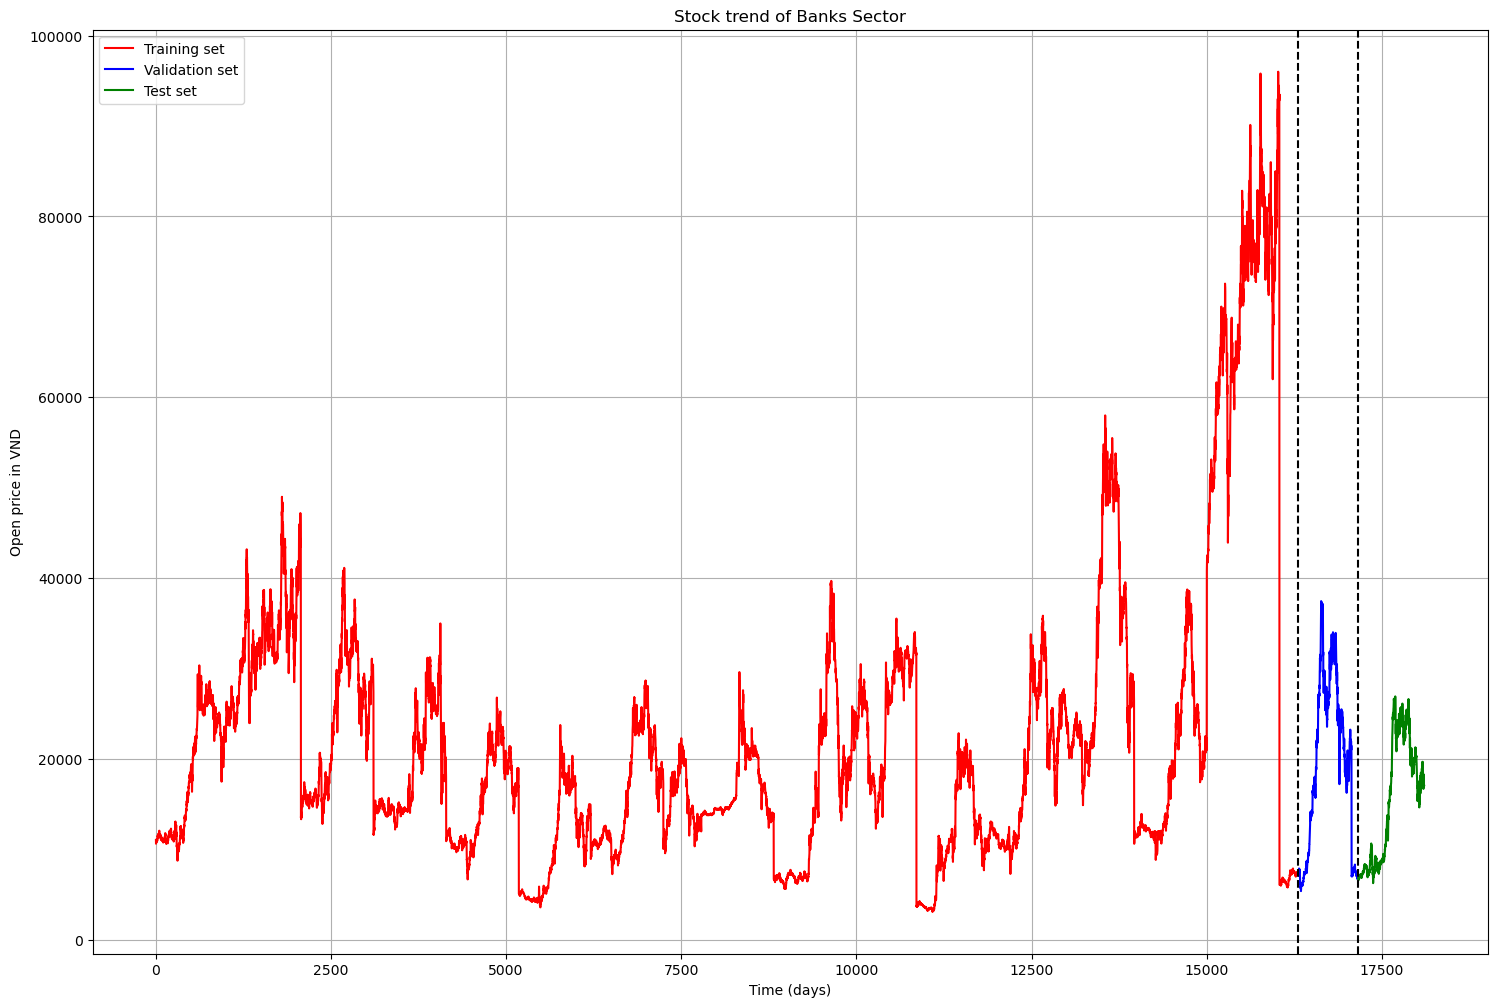

In [18]:
# Visualize the training, validation and test set
df_plot = historical_prices['Close']
df_plot = df_plot.reset_index(drop=False)

# Get lengths of the three subsets
size_train = X_train.shape[0]
size_val = X_val.shape[0]
size_test = X_test.shape[0]

# Create the figure and axis objects
fig, ax = plt.subplots()

# Plot the subset splits
df_plot.iloc[:size_train, 1:2].plot(y=0, color='red', label='Training set', ax=ax)
df_plot.iloc[size_train:size_train + size_val, 1:2].plot(y=0, color='blue', label='Validation set', ax=ax)
df_plot.iloc[size_train + size_val:df_plot.shape[0], 1:2].plot(y=0, color='green', label='Test set', ax=ax)

# Set the title, labels, and vertical lines
ax.set_title("Stock trend of Banks Sector")
ax.set_xlabel('Time (days)')
ax.set_ylabel('Open price in VND')
ax.axvline(x=size_train, color='black', linestyle='--')
ax.axvline(x=size_train + size_val, color='black', linestyle='--')

# Add grid and legend
ax.grid()
ax.legend()

# Show the plot
plt.show()


In [19]:
# MinMax normalization
from helper_functions import data_preprocessing as pp
X_train_norm, y_train_norm = pp.normalize_data(X_train, y_train)
X_val_norm, y_val_norm = pp.normalize_data(X_val, y_val)
X_test_norm, y_test_norm = pp.normalize_data(X_test, y_test)

In [20]:
### Create and train the model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

# Define the LSTM model
model = Sequential()
model.add(LSTM(256, return_sequences=True, input_shape=(30, 1), activation='relu'))  # LSTM layer with 128 units
model.add(Dropout(0.2))  # Dropout layer for regularization
model.add(LSTM(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))  
model.add(Dense(1))  # Dense output layer with 1 units

early_stopping = EarlyStopping(monitor='val_mse', patience=10, restore_best_weights=True)

# Compile and train the model with Mean Squared Error loss function
model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.005), loss='mse', metrics=['mse'])
history = model.fit(X_train_norm, y_train_norm, validation_data=(X_val_norm,y_val_norm), epochs=50, batch_size=1028, callbacks=[early_stopping])

Epoch 1/50
16/16 [==============================] - 30s 2s/step - loss: 1.9754 - mse: 1.9754 - val_loss: 0.4493 - val_mse: 0.4493
Epoch 2/50
16/16 [==============================] - 29s 2s/step - loss: 0.2709 - mse: 0.2709 - val_loss: 0.1933 - val_mse: 0.1933
Epoch 3/50
16/16 [==============================] - 31s 2s/step - loss: 0.1735 - mse: 0.1735 - val_loss: 0.1554 - val_mse: 0.1554
Epoch 4/50
16/16 [==============================] - 29s 2s/step - loss: 0.1444 - mse: 0.1444 - val_loss: 0.0988 - val_mse: 0.0988
Epoch 5/50
16/16 [==============================] - 27s 2s/step - loss: 0.1175 - mse: 0.1175 - val_loss: 0.0902 - val_mse: 0.0902
Epoch 6/50
16/16 [==============================] - 28s 2s/step - loss: 0.1044 - mse: 0.1044 - val_loss: 0.0738 - val_mse: 0.0738
Epoch 7/50
16/16 [==============================] - 28s 2s/step - loss: 0.0935 - mse: 0.0935 - val_loss: 0.0715 - val_mse: 0.0715
Epoch 8/50
16/16 [==============================] - 28s 2s/step - loss: 0.0880 - mse: 0.08

In [21]:
### Get prediction on the test data and convert the result back to stock price (i.e., de-normalization)
from sklearn.metrics import mean_squared_error

# Get prediction on the test data
y_pred_norm = model.predict(X_test_norm)
print("MSE on the test set: ", mean_squared_error(y_pred_norm, y_test_norm))

29/29 [==============================] - 1s 31ms/step
MSE on the test set:  0.027129235027515117


In [22]:
# Convert the result back to stock price (i.e., de-normalization) for visualization purpose
y_pred_denorm = pp.denorm_data(y_pred_norm, X_test)

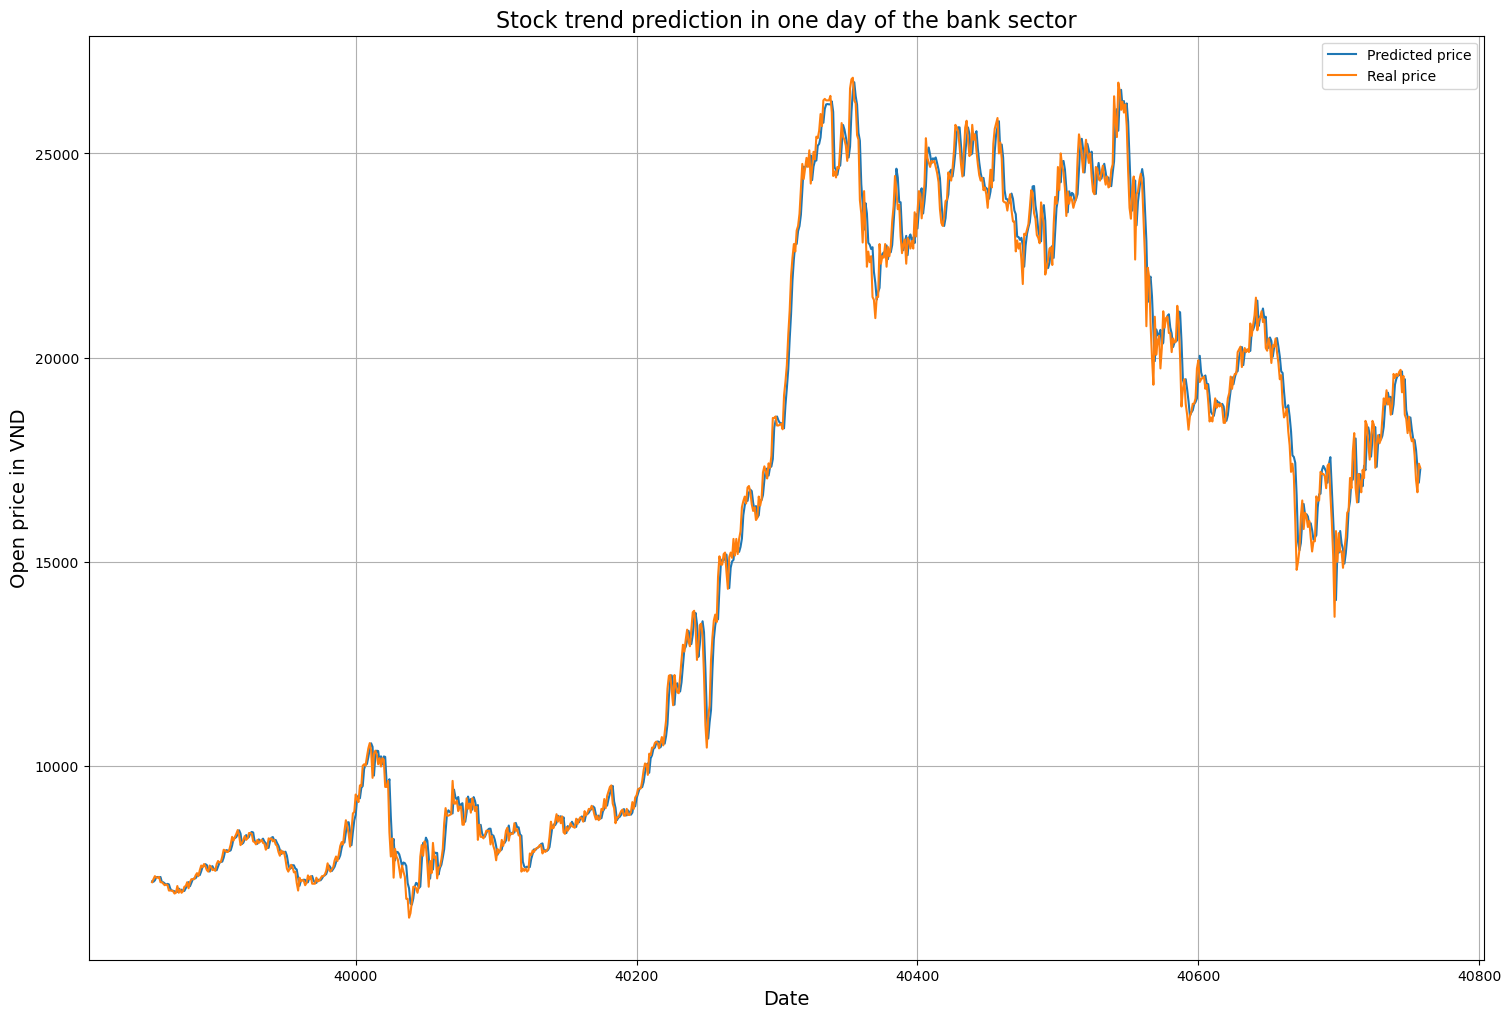

In [23]:
# Visualize predited stock price versus real stock price
plt.plot(test_dates, y_pred_denorm, label='Predicted price')
plt.plot(test_dates, y_test, label='Real price')
plt.title('Stock trend prediction in one day of the bank sector', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Open price in VND', fontsize=14)
plt.grid() # Add grid
plt.legend() # Add legend
plt.show()